In [1]:
#import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the dataset
Loan_data_train = pd.read_csv('credit_train.csv')

In [3]:
#Top 5 rows of train data
Loan_data_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
#Dimension of train dataset
Loan_data_train.shape

(100514, 19)

In [5]:
#Checking the columns information
Loan_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
#Checking the null values
Loan_data_train.isnull().sum()

,0
Loan ID,514
Customer ID,514
Loan Status,514
Current Loan Amount,514
Term,514
Credit Score,19668
Annual Income,19668
Years in current job,4736
Home Ownership,514
Purpose,514


In [7]:
# Fixing the Credit Score column by capping the values at 850
Loan_data_train['Credit Score'] = Loan_data_train['Credit Score'].apply(lambda x: x if len(str(x))<4 else int(str(x)[:3]))

In [8]:
#Statistical Description of dataset
pd.options.display.float_format = '{:.2f}'.format
Loan_data_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,716.29,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,28.30,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,703.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,722.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,738.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,751.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


In [9]:
#Drop the Id columns
Loan_data_train = Loan_data_train.drop(['Customer ID','Loan ID'], axis=1)

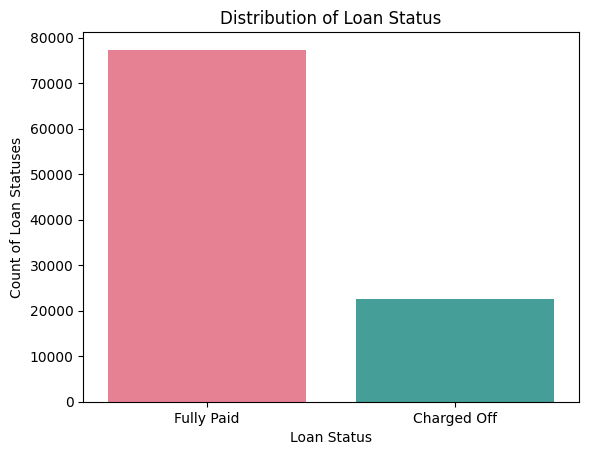

In [10]:
#Countplot for Loan Status
sns.countplot(x='Loan Status', data=Loan_data_train, palette='husl')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count of Loan Statuses')
plt.show()

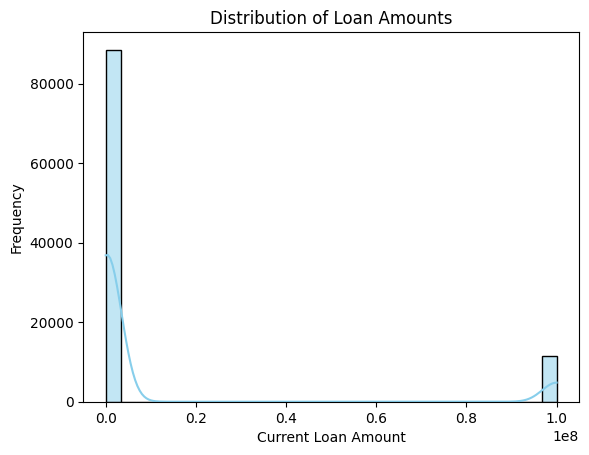

In [11]:
# Distribution of Loan Amounts
sns.histplot(Loan_data_train['Current Loan Amount'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Current Loan Amount')
plt.ylabel('Frequency')
plt.show()

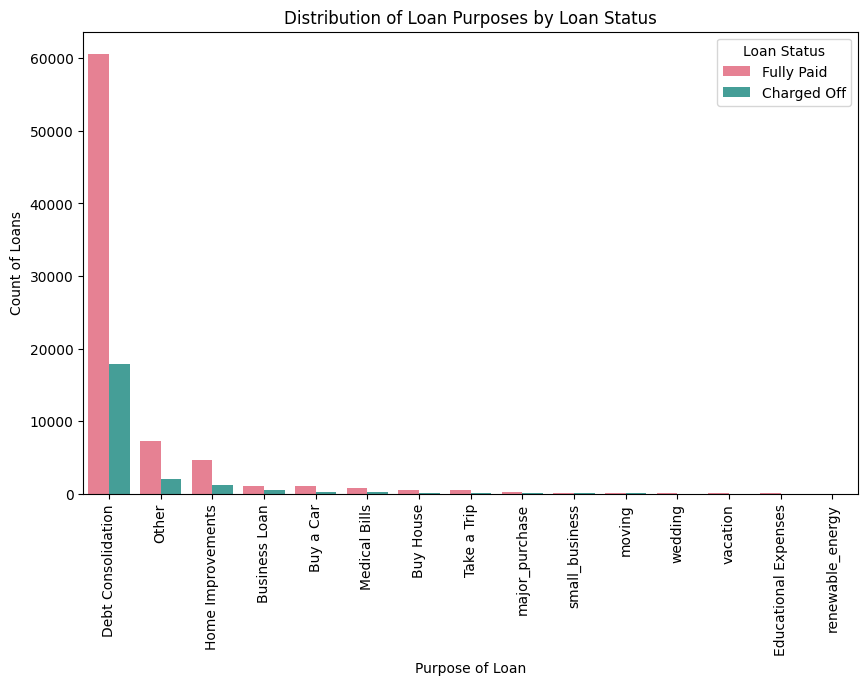

In [12]:
# Count plot for Purpose of Loans
plt.figure(figsize=(10, 6))
Loan_data_train['Purpose'] = Loan_data_train['Purpose'].replace(['other', 'Other'], 'Other')
sns.countplot(x ='Purpose', hue='Loan Status', data=Loan_data_train, palette="husl", order=Loan_data_train['Purpose'].value_counts().index)
plt.title('Distribution of Loan Purposes by Loan Status')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Loans')
plt.xticks(rotation=90)
plt.show()

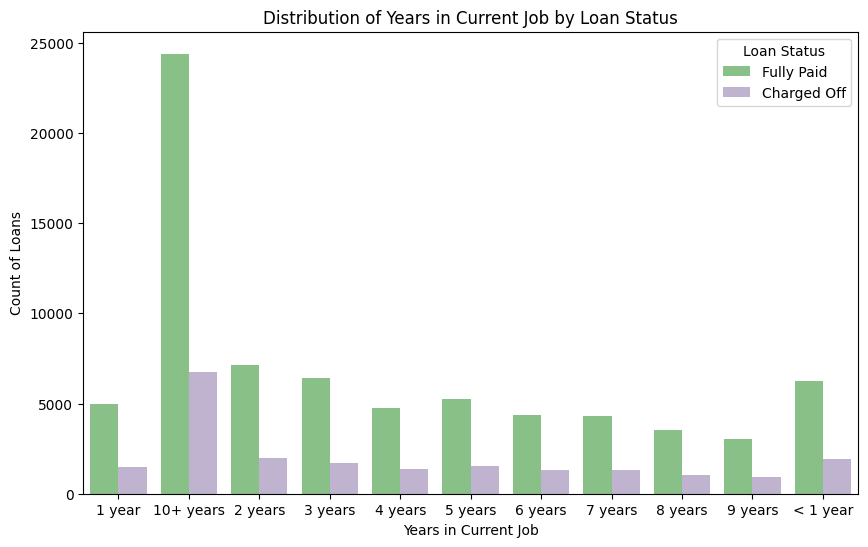

In [13]:
# Create a sorted list
sorted_years = Loan_data_train['Years in current job'].value_counts().sort_index().index.tolist()

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Years in current job', hue='Loan Status', palette='Accent', data=Loan_data_train, order=sorted_years)

plt.title('Distribution of Years in Current Job by Loan Status')
plt.xlabel('Years in Current Job')
plt.ylabel('Count of Loans')
plt.show()


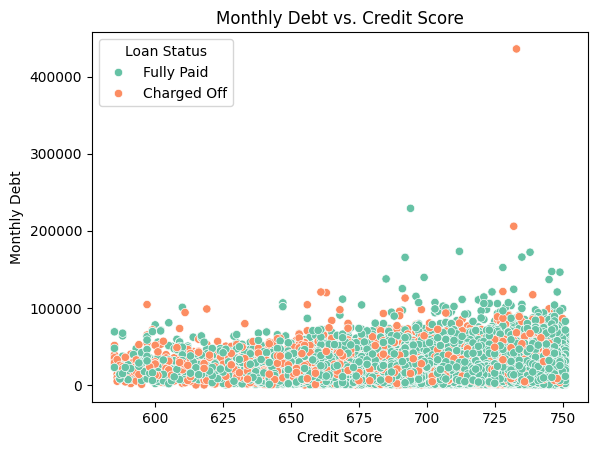

In [14]:
# Scatterplot for Monthly Debt vs. Credit Score
sns.scatterplot(x='Credit Score', y='Monthly Debt', hue='Loan Status', data=Loan_data_train, palette='Set2')
plt.title('Monthly Debt vs. Credit Score')
plt.show()

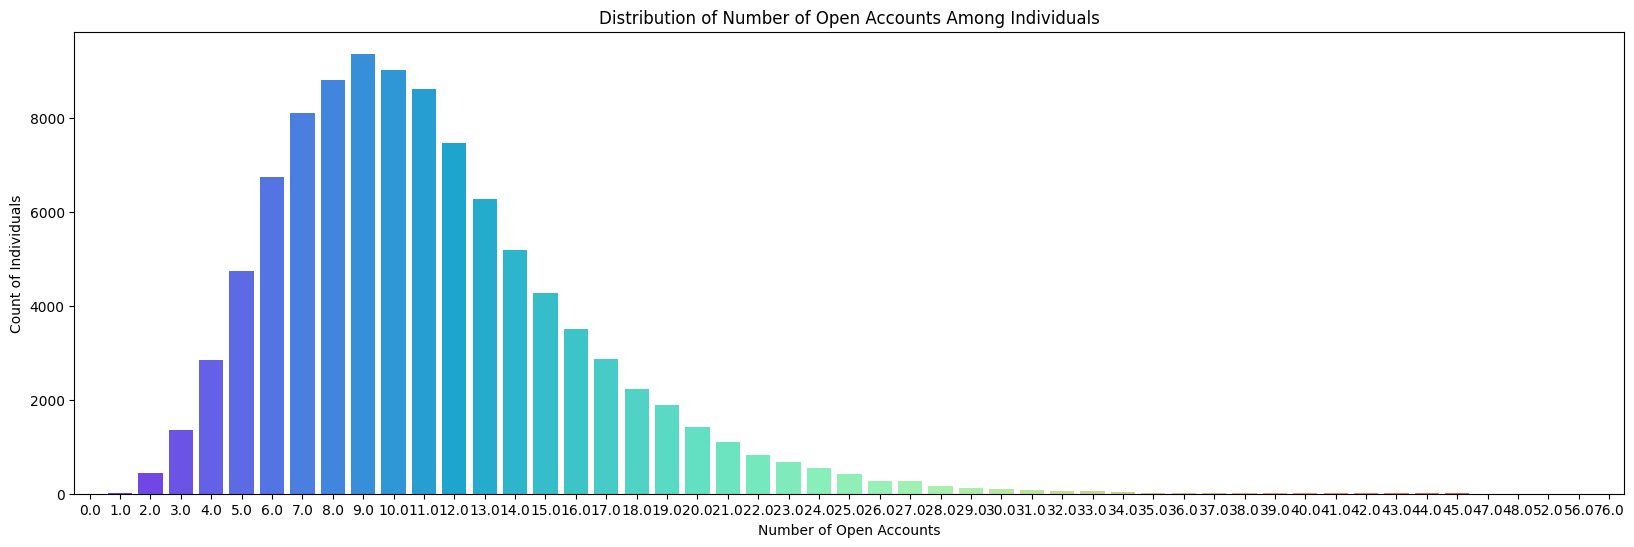

In [15]:
# Countplot for Number of Open Accounts
plt.figure(figsize=(20, 6))
sns.countplot(x='Number of Open Accounts', data=Loan_data_train, palette='rainbow')

# Title and Labels
plt.title('Distribution of Number of Open Accounts Among Individuals')  # Updated title
plt.xlabel('Number of Open Accounts')  # X-axis label
plt.ylabel('Count of Individuals')  # Y-axis label

plt.show()

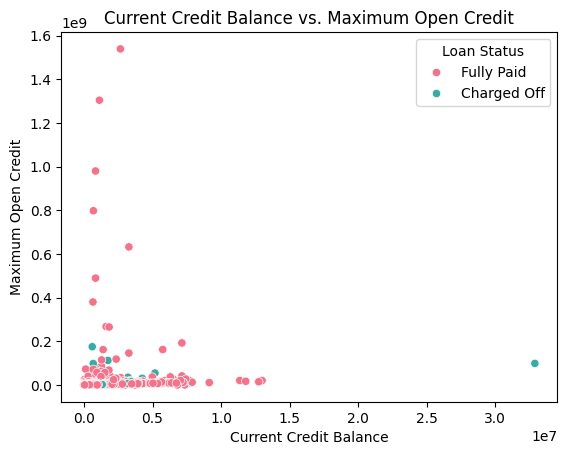

In [16]:
#Scatterplot for Current Credit Balance and Maximum Open Credit
sns.scatterplot(x='Current Credit Balance', y='Maximum Open Credit', data=Loan_data_train, hue='Loan Status', palette="husl")
plt.title('Current Credit Balance vs. Maximum Open Credit')
plt.show()

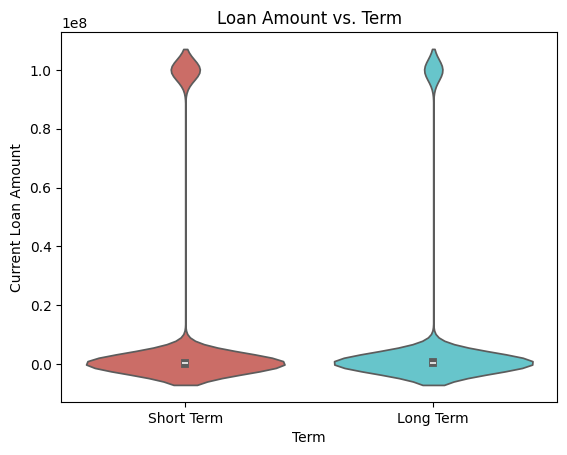

In [17]:
# Current Loan Amount vs. Term
sns.violinplot(x='Term', y='Current Loan Amount', data=Loan_data_train, palette="hls")
plt.title('Loan Amount vs. Term')
plt.show()

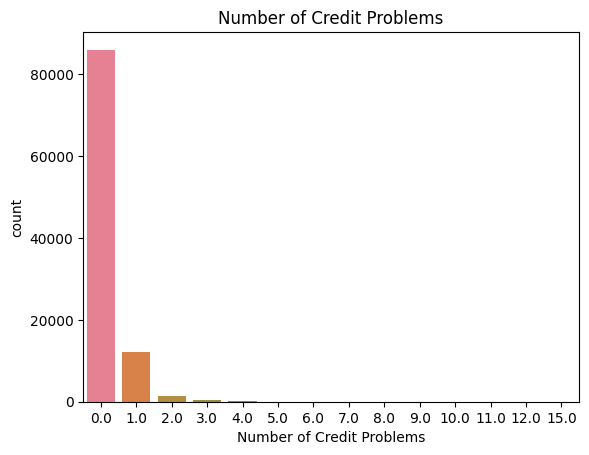

In [18]:
# Number of Credit Problems
sns.countplot(x='Number of Credit Problems', data=Loan_data_train, palette="husl")
plt.title('Number of Credit Problems')
plt.show()

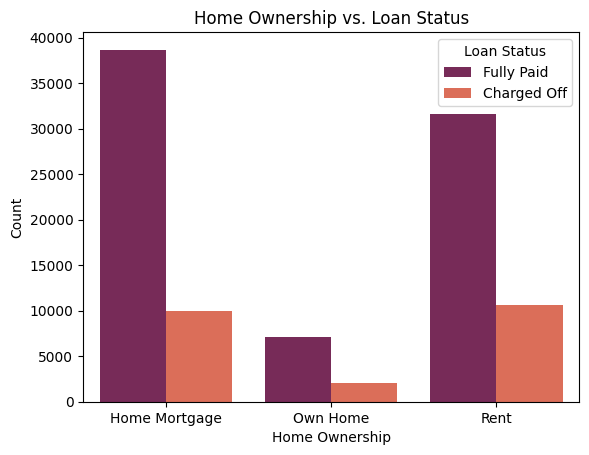

In [19]:
# Countplot for Home Ownership
Loan_data_train['Home Ownership'] = Loan_data_train['Home Ownership'].replace(['Home Mortgage', 'HaveMortgage'], 'Home Mortgage')
sns.countplot(x='Home Ownership', hue='Loan Status', data=Loan_data_train, palette='rocket')
plt.title('Home Ownership vs. Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

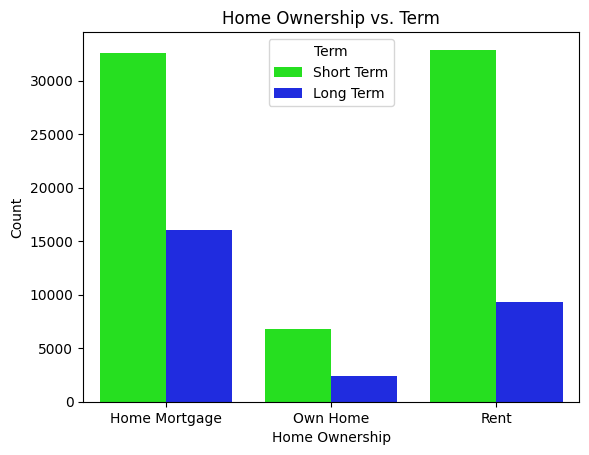

In [20]:
#Countplot for Home Ownership using Term
sns.countplot(x='Home Ownership', hue='Term', data=Loan_data_train, palette='hsv')
plt.title('Home Ownership vs. Term')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

In [21]:
#unique values of Home Ownership
Loan_data_train['Home Ownership'].value_counts()

,count
Home Ownership,
Home Mortgage,48624
Rent,42194
Own Home,9182


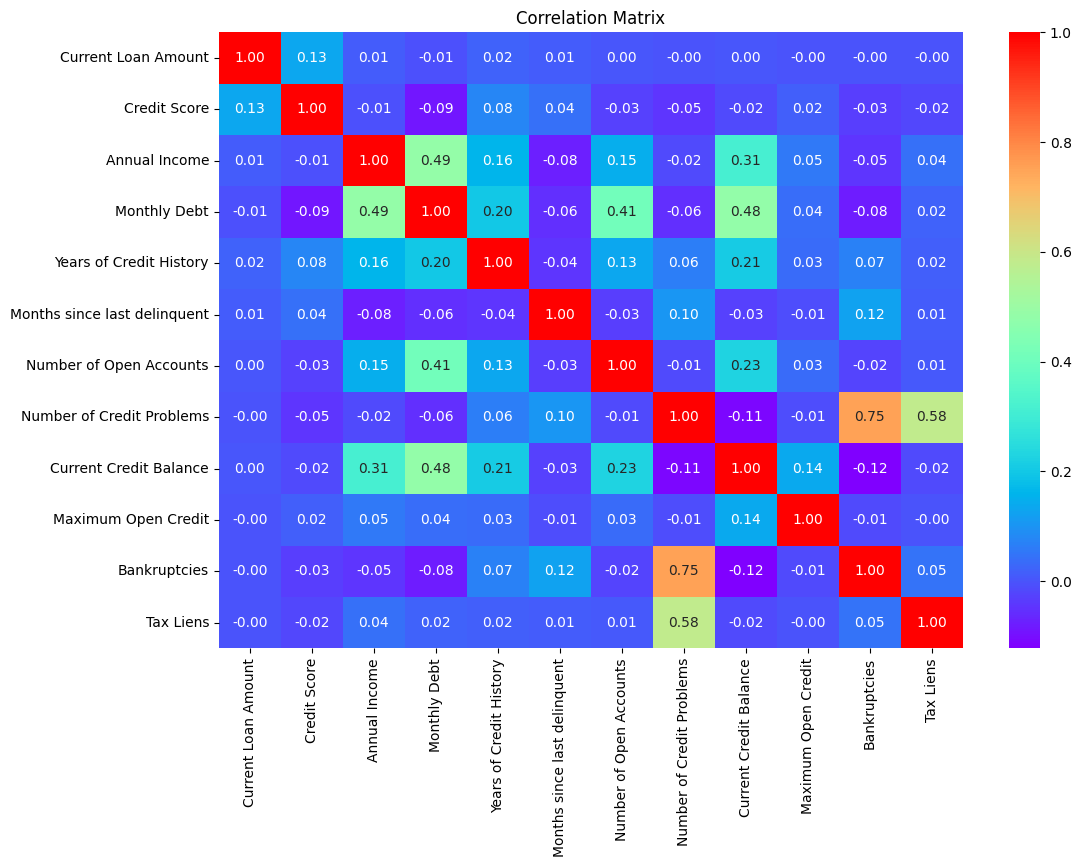

In [22]:
# Exclude non-numeric columns
numeric_columns = Loan_data_train.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Calculate total missing values
total_missing = Loan_data_train.isnull().sum()

# Calculate percentage of missing values
percent_missing = (total_missing / len(Loan_data_train)) * 100

# Concatenate total and percentage missing values
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

# Display the top 19 rows
missing_data.head(19)


,Total,Percent
Loan Status,514,0.51
Current Loan Amount,514,0.51
Term,514,0.51
Credit Score,19668,19.57
Annual Income,19668,19.57
Years in current job,4736,4.71
Home Ownership,514,0.51
Purpose,514,0.51
Monthly Debt,514,0.51
Years of Credit History,514,0.51


In [24]:
#Drop the columns month since last delinquent because it has more than 50 percent missing value
Loan_data_train.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [25]:
# Checking for null values in the 'Years of Credit History' column
null_years_of_credit_history = Loan_data_train[Loan_data_train['Years of Credit History'].isnull()]
null_years_of_credit_history

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#drop the last 514 rows
Loan_data_train.drop(Loan_data_train.tail(514).index, inplace=True)

In [27]:
Loan_data_train.isnull().sum()

,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,19154
Annual Income,19154
Years in current job,4222
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0


In [28]:
# Calculate total missing values
total_missing = Loan_data_train.isnull().sum()

# Calculate percentage of missing values
percent_missing = (total_missing / len(Loan_data_train)) * 100

# Concatenate total and percentage missing values
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

# Display the top 19 rows
missing_data.head(19)


,Total,Percent
Loan Status,0,0.00
Current Loan Amount,0,0.00
Term,0,0.00
Credit Score,19154,19.15
Annual Income,19154,19.15
Years in current job,4222,4.22
Home Ownership,0,0.00
Purpose,0,0.00
Monthly Debt,0,0.00
Years of Credit History,0,0.00


In [29]:
Loan_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Credit Score               80846 non-null   float64
 4   Annual Income              80846 non-null   float64
 5   Years in current job       95778 non-null   object 
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        999

In [30]:
#Label Encoder
le = LabelEncoder()
Loan_data_train['Term']=le.fit_transform(Loan_data_train['Term'])
Loan_data_train['Years in current job']=le.fit_transform(Loan_data_train['Years in current job'])
Loan_data_train['Home Ownership']=le.fit_transform(Loan_data_train['Home Ownership'])
Loan_data_train['Purpose']=le.fit_transform(Loan_data_train['Purpose'])
Loan_data_train['Loan Status']=le.fit_transform(Loan_data_train['Loan Status'])

In [31]:
#Fill null values with median
Loan_data_train['Credit Score'].fillna(Loan_data_train['Credit Score'].median(),inplace= True)
Loan_data_train['Annual Income'].fillna(Loan_data_train['Annual Income'].median(),inplace= True)
Loan_data_train['Years in current job'].fillna(Loan_data_train['Years in current job'].median(),inplace= True)
# Fill null values with 0 for count variables
Loan_data_train['Bankruptcies'].fillna(0, inplace=True)
Loan_data_train['Tax Liens'].fillna(0, inplace=True)
Loan_data_train['Maximum Open Credit'].fillna(Loan_data_train['Maximum Open Credit'].median(),inplace= True)

In [32]:
Loan_data_train.isnull().sum()

,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Annual Income,0
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0


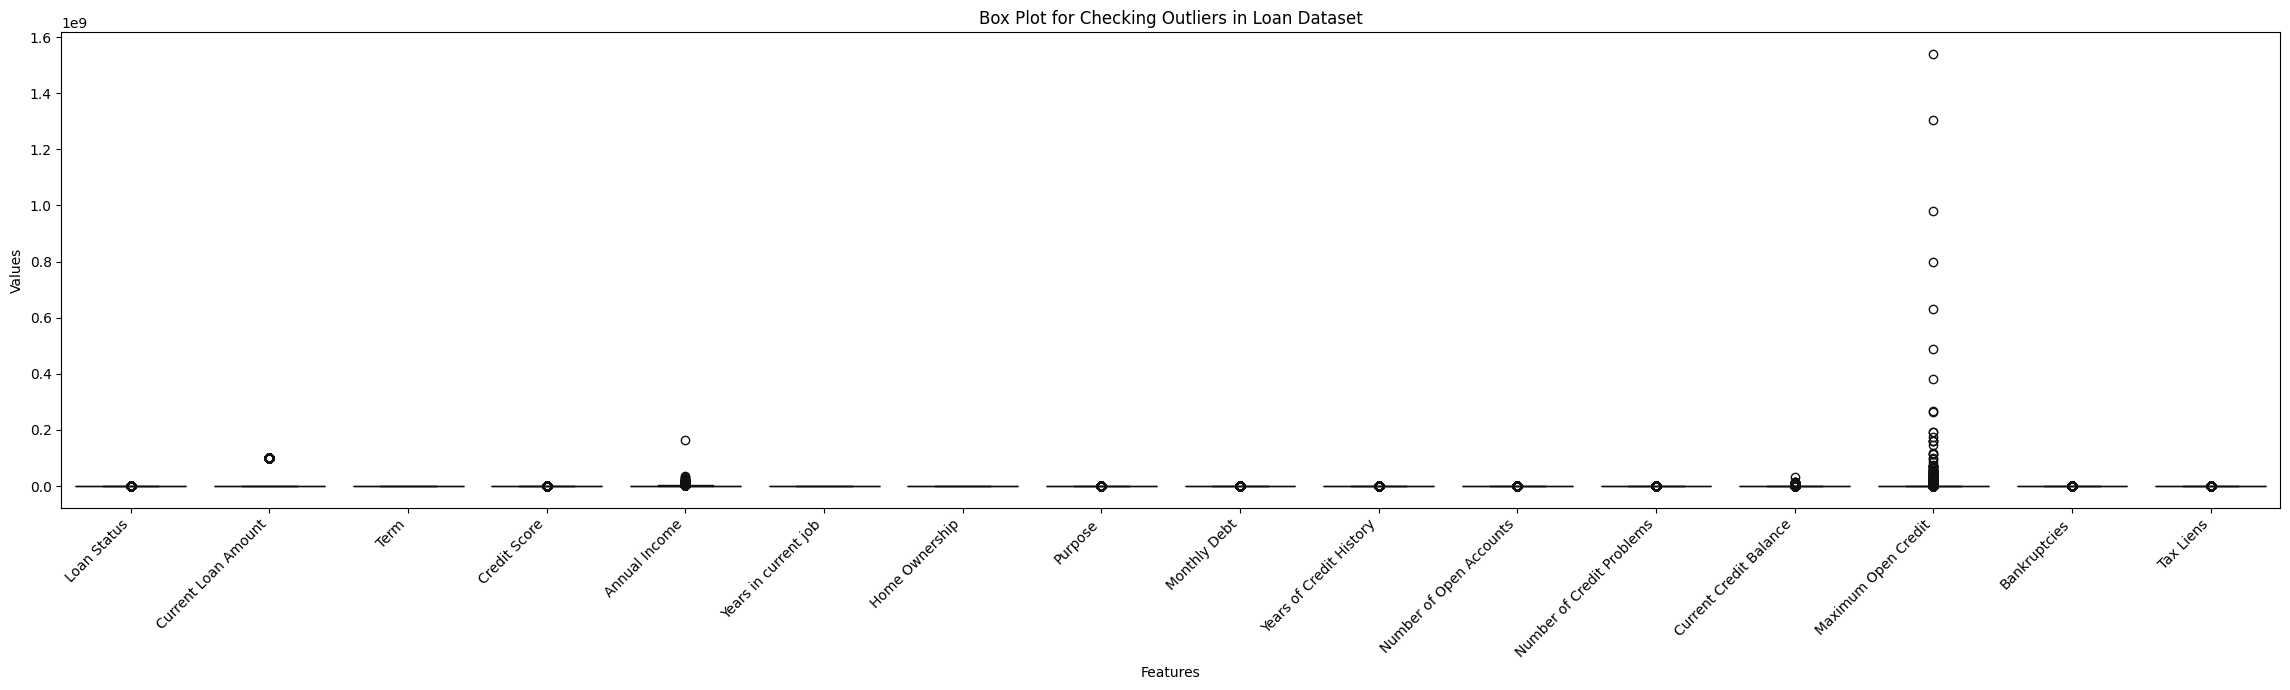

In [33]:
# Set up the figure size
plt.figure(figsize=(23, 7))

# Create a box plot for the entire dataset
boxplot = sns.boxplot(data=Loan_data_train, palette='rocket')

# Rotate x-axis labels for better readability
boxplot.set_xticklabels(Loan_data_train.columns, rotation=45, ha='right')

# Set plot title and labels for clarity
plt.title('Box Plot for Checking Outliers in Loan Dataset')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
def remove_outliers(df):
    # Create a copy of the original DataFrame to avoid modifying it directly
    df_filtered = df.copy()

    # Iterate through all numerical columns in the DataFrame
    for column in df_filtered.select_dtypes(include=['float64', 'int64']).columns:
      if column in ['Current Loan Amount','Annual Income']:
        # Calculate Q1 and Q3
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

# Apply the function to remove outliers
Loan_filtered = remove_outliers(Loan_data_train)

# Print the shapes before and after removing outliers
print("Old Shape: ", Loan_data_train.shape)
print("New Shape: ", Loan_filtered.shape)

Old Shape:  (100000, 16)
New Shape:  (82018, 16)


In [35]:
# Define the threshold
threshold = 7.1**8

# Filter the DataFrame to keep only rows where 'Maximum Open Credit' is less than or equal to the threshold
Loan_filtered = Loan_filtered[Loan_filtered['Maximum Open Credit'] <= threshold]


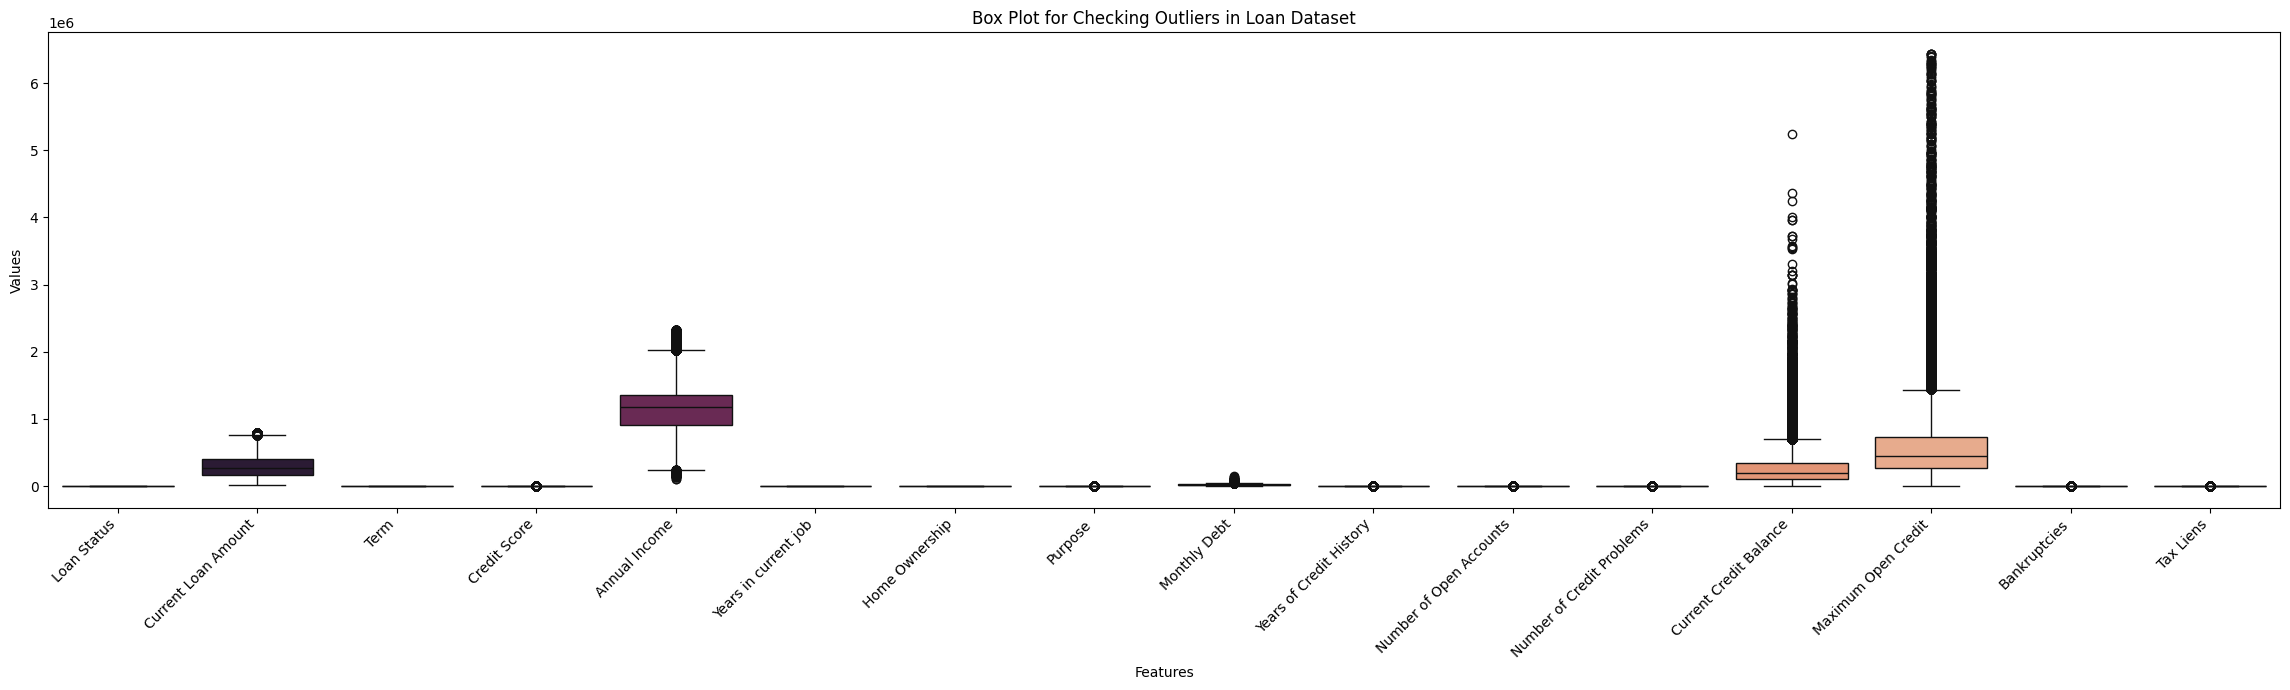

In [36]:
# Set up the figure size
plt.figure(figsize=(23, 7))

# Create a box plot for the entire dataset
boxplot = sns.boxplot(data=Loan_filtered, palette='rocket')

# Rotate x-axis labels for better readability
boxplot.set_xticklabels(Loan_filtered.columns, rotation=45, ha='right')

# Set plot title and labels for clarity
plt.title('Box Plot for Checking Outliers in Loan Dataset')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
Loan_filtered.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.00,1,709.00,1167493.00,8,0,5,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00
1,1,262328.00,1,722.00,1174162.00,1,0,3,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00,0.00
3,1,347666.00,0,721.00,806949.00,3,1,3,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,0.00
4,1,176220.00,1,722.00,1174162.00,5,2,3,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00,0.00
5,0,206602.00,1,729.00,896857.00,1,0,3,16367.74,17.30,6.00,0.00,215308.00,272448.00,0.00,0.00


In [38]:
#rearranging the columns
Loan_data_train = Loan_filtered[['Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History','Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status']]
Loan_data_train.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,445412.00,1,709.00,1167493.00,8,0,5,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00,1
1,262328.00,1,722.00,1174162.00,1,0,3,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00,0.00,1
3,347666.00,0,721.00,806949.00,3,1,3,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,0.00,1
4,176220.00,1,722.00,1174162.00,5,2,3,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00,0.00,1
5,206602.00,1,729.00,896857.00,1,0,3,16367.74,17.30,6.00,0.00,215308.00,272448.00,0.00,0.00,0


In [39]:
Loan_data_train.isnull().sum()

,0
Current Loan Amount,0
Term,0
Credit Score,0
Annual Income,0
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0
Number of Open Accounts,0


In [40]:
#separating dependent and independent features
x = Loan_data_train.drop(['Loan Status'] , axis = 1)
y = Loan_data_train['Loan Status' ]

In [41]:
#perform train and test split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

In [42]:
# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [43]:
# Apply RobustScaler to the features
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)


In [44]:
Loan_filtered = pd.DataFrame(x_train_scaled, columns=x_train.columns)

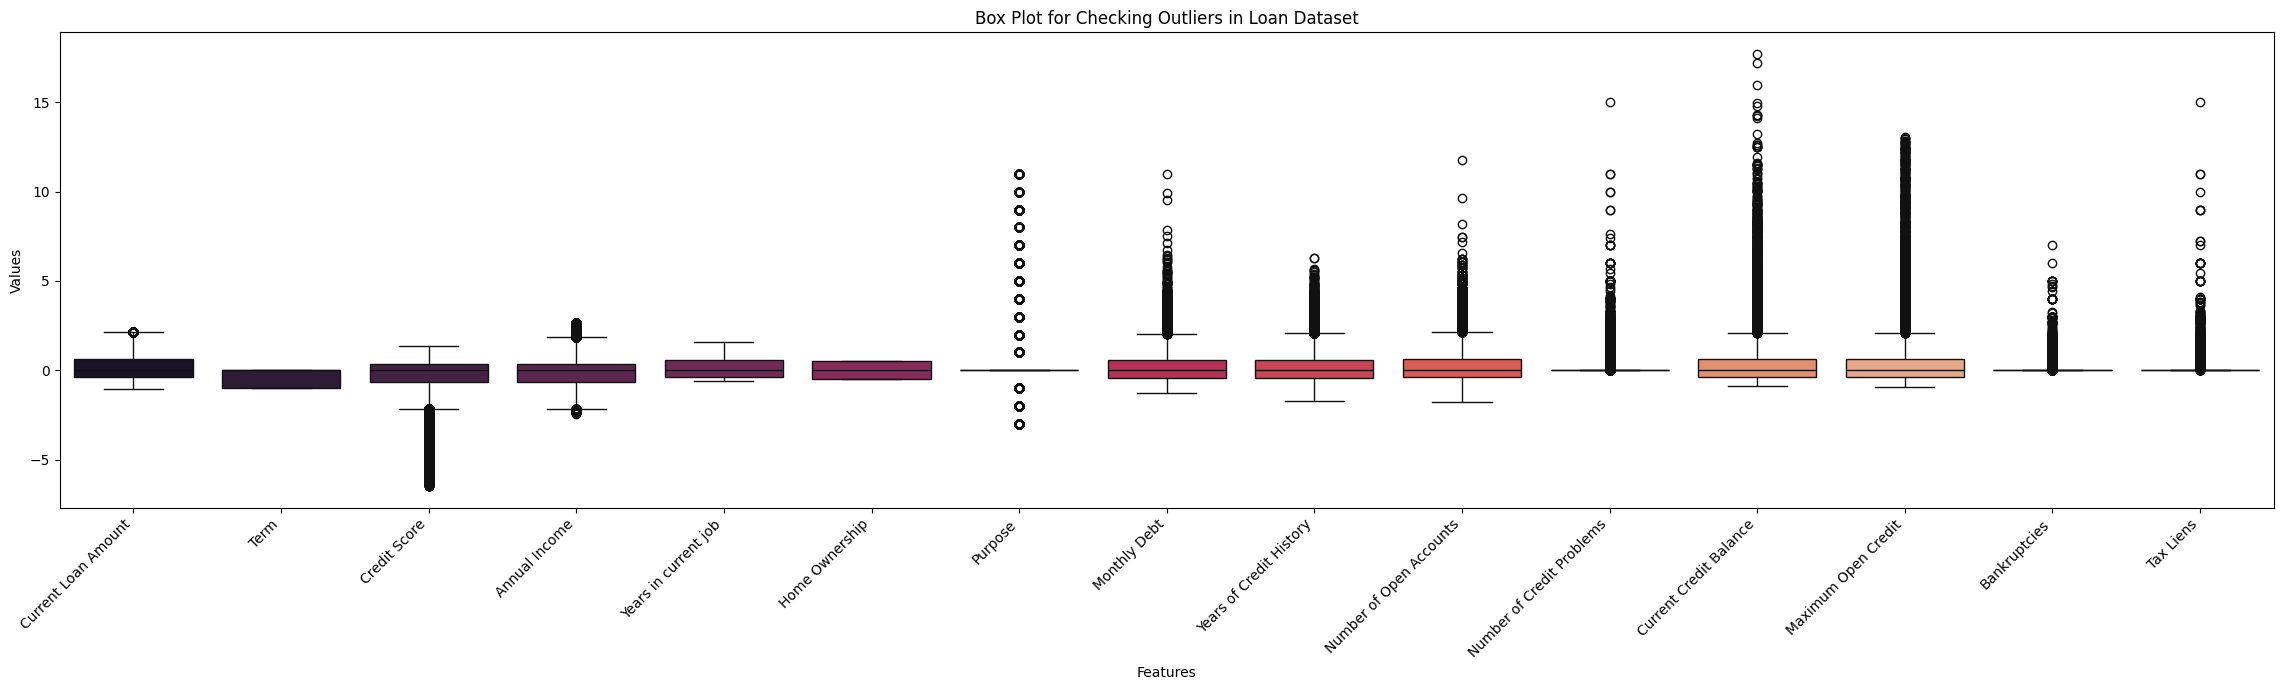

In [45]:
# Set up the figure size
plt.figure(figsize=(23, 7))

# Create a box plot for the entire dataset
boxplot = sns.boxplot(data=Loan_filtered, palette='rocket')

# Rotate x-axis labels for better readability
boxplot.set_xticklabels(Loan_filtered.columns, rotation=45, ha='right')

# Set plot title and labels for clarity
plt.title('Box Plot for Checking Outliers in Loan Dataset')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

# Initialize the classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid,
                           scoring='f1_weighted', cv=3, n_jobs=-1, verbose=10)

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize the classifier with the best parameters
best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)

# Fit the model
best_gb_classifier.fit(x_train_scaled, y_train_resampled)

# Predictions
y_pred = best_gb_classifier.predict(x_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Classifier Metrics (After Hyperparameter Tuning):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Gradient Boosting Classifier Metrics (After Hyperparameter Tuning):
Accuracy: 0.6877
Precision: 0.6566
Recall: 0.6877
F1 Score: 0.6682
Confusion Matrix:
[[ 1088  3192]
 [ 1917 10161]]


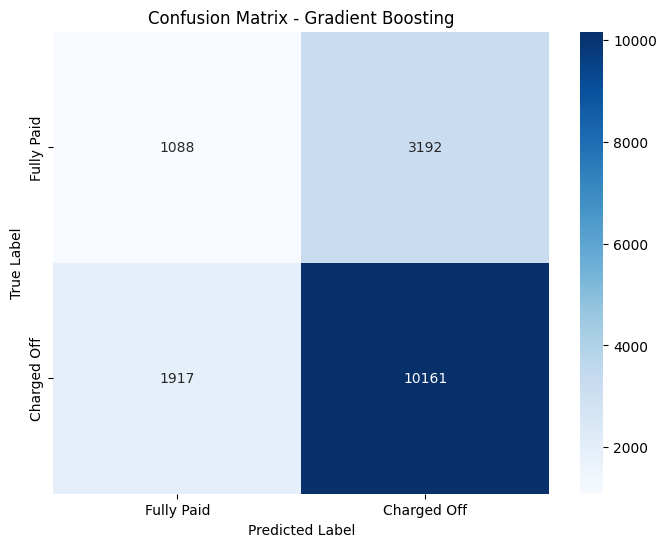

In [47]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fully Paid', 'Charged Off'], yticklabels=['Fully Paid', 'Charged Off'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

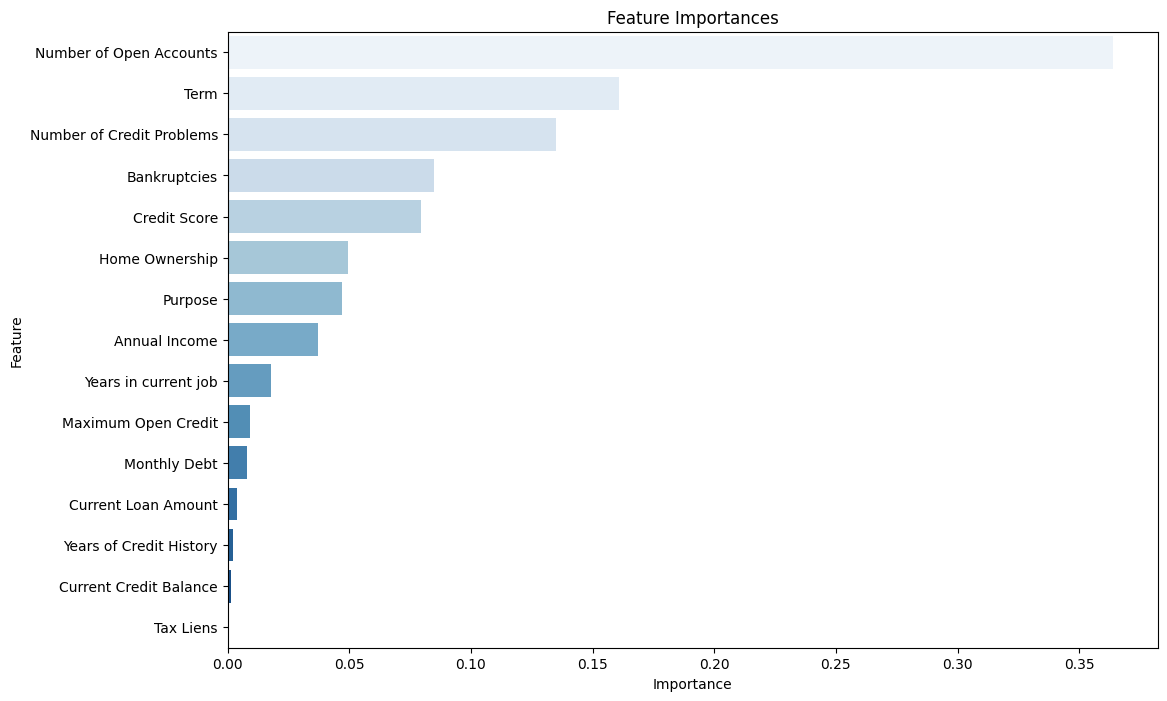

In [58]:
# Feature importance
feature_importances = best_gb_classifier.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues')
plt.title('Feature Importances')
plt.show()

In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

# Initialize the classifier
xgb_classifier = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='f1_weighted', cv=3, n_jobs=-1, verbose=10)

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize the classifier with the best parameters
best_xgb_classifier = XGBClassifier(**best_params, random_state=42, eval_metric='mlogloss')

# Fit the model
best_xgb_classifier.fit(x_train_scaled, y_train_resampled)

# Predictions
y_pred = best_xgb_classifier.predict(x_test_scaled)

# Calculate evaluation metrics
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f1_1 = f1_score(y_test, y_pred, average='weighted')
cm1 = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("XGBoost Classifier Metrics (After Hyperparameter Tuning):")
print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1 Score: {f1_1:.4f}")
print("Confusion Matrix:")
print(cm1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
XGBoost Classifier Metrics (After Hyperparameter Tuning):
Accuracy: 0.7145
Precision: 0.6647
Recall: 0.7145
F1 Score: 0.6748
Confusion Matrix:
[[  802  3478]
 [ 1193 10885]]


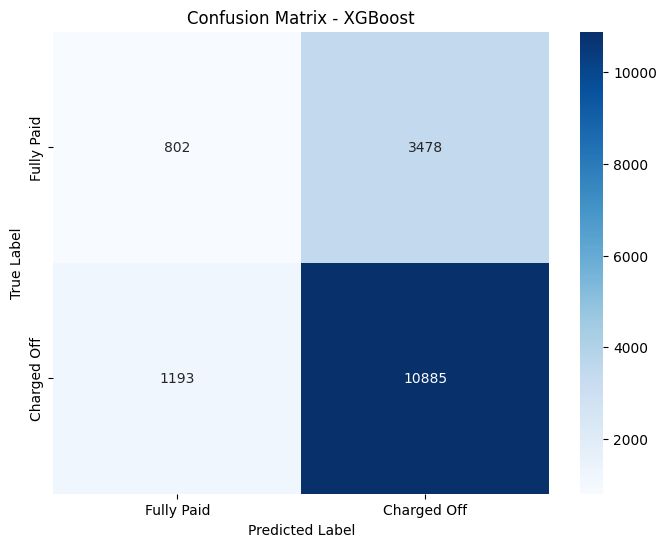

In [49]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Fully Paid', 'Charged Off'], yticklabels=['Fully Paid', 'Charged Off'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

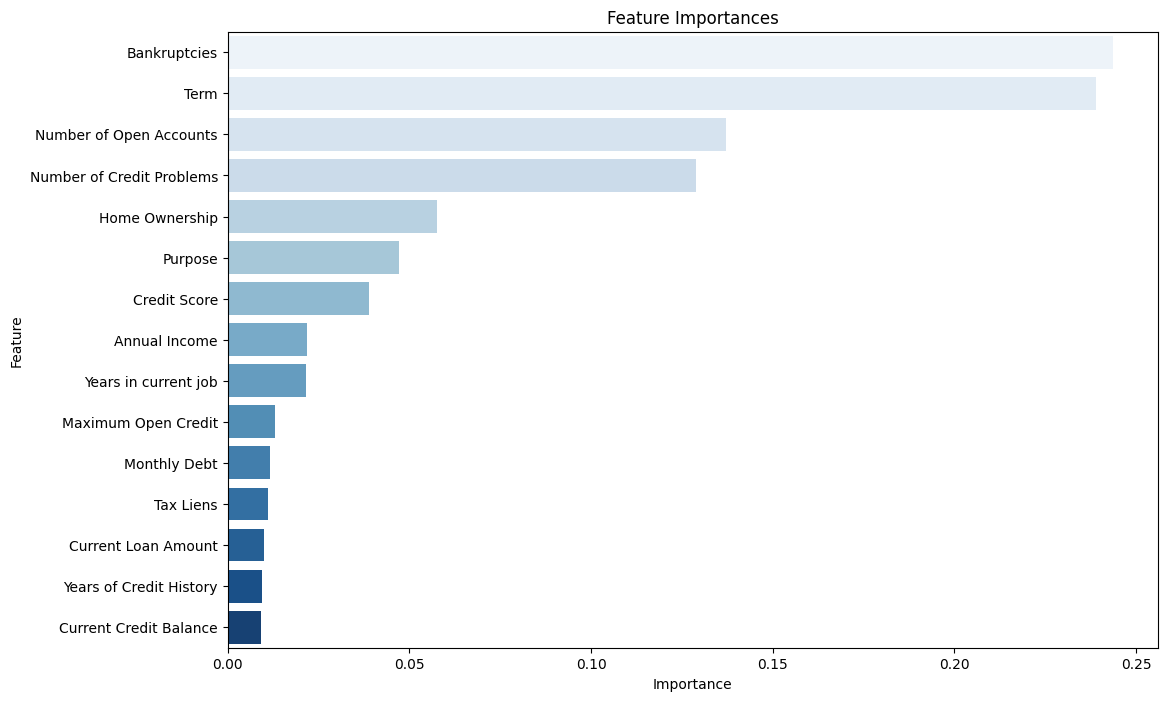

In [59]:
# Feature importance
feature_importances = best_xgb_classifier.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues')
plt.title('Feature Importances')
plt.show()

In [50]:
# Reshape data for CNN and LSTM
x_train_scaled = x_train_scaled.reshape((x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
x_test_scaled = x_test_scaled.reshape((x_test_scaled.shape[0], x_test_scaled.shape[1], 1))

In [51]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train_scaled.shape[1], 1)))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train_scaled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predict and evaluate the model
y_pred = (model.predict(x_test_scaled) > 0.5).astype("int32")

accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f1_3 = f1_score(y_test, y_pred)
cm_3 = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy3}')
print(f'Precision: {precision3}')
print(f'Recall: {recall3}')
print(f'F1 Score: {f1_3}')
print(f'Confusion Matrix: \n{cm_3}')

Epoch 1/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.6234 - loss: 0.6573 - val_accuracy: 0.1351 - val_loss: 0.8894
Epoch 2/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.6261 - loss: 0.6467 - val_accuracy: 0.1352 - val_loss: 0.9314
Epoch 3/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6335 - loss: 0.6437 - val_accuracy: 0.2597 - val_loss: 0.8709
Epoch 4/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6372 - loss: 0.6418 - val_accuracy: 0.3445 - val_loss: 0.8671
Epoch 5/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6393 - loss: 0.6394 - val_accuracy: 0.3311 - val_loss: 0.8415
Epoch 6/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6428 - loss: 0.6378 - val_accuracy: 0.3548 - val_loss: 0.8578
Epoch 7/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6427 - loss: 0.6359 - val_accuracy: 0.4189 - val_loss: 0.8267
Epoch 8/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6517 - loss: 

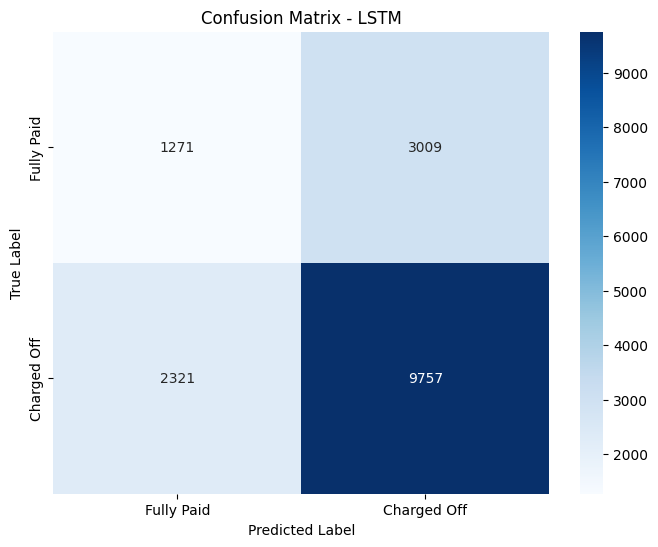

In [52]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', xticklabels=['Fully Paid', 'Charged Off'], yticklabels=['Fully Paid', 'Charged Off'])
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [53]:
# Build CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(x_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train_scaled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predict and evaluate the model
y_pred = (model.predict(x_test_scaled) > 0.5).astype("int32")

accuracy_4 = accuracy_score(y_test, y_pred)
precision_4 = precision_score(y_test, y_pred)
recall_4 = recall_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred)
cm_4 = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy_4}')
print(f'Precision: {precision_4}')
print(f'Recall: {recall_4}')
print(f'F1 Score: {f1_4}')
print(f'Confusion Matrix: \n{cm_4}')

Epoch 1/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6301 - loss: 0.6466 - val_accuracy: 0.2429 - val_loss: 0.8729
Epoch 2/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6438 - loss: 0.6325 - val_accuracy: 0.2485 - val_loss: 0.8711
Epoch 3/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6519 - loss: 0.6267 - val_accuracy: 0.3202 - val_loss: 0.8353
Epoch 4/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6552 - loss: 0.6253 - val_accuracy: 0.3023 - val_loss: 0.8559
Epoch 5/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6544 - loss: 0.6228 - val_accuracy: 0.3952 - val_loss: 0.8067
Epoch 6/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6599 - loss: 0.6213 - val_accuracy: 0.3155 - val_loss: 0.8536
Epoch 7/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6586 - loss: 0.6204 - val_accuracy: 0.4455 - val_loss: 0.7729
Epoch 8/10
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6617 - loss: 0.6151 

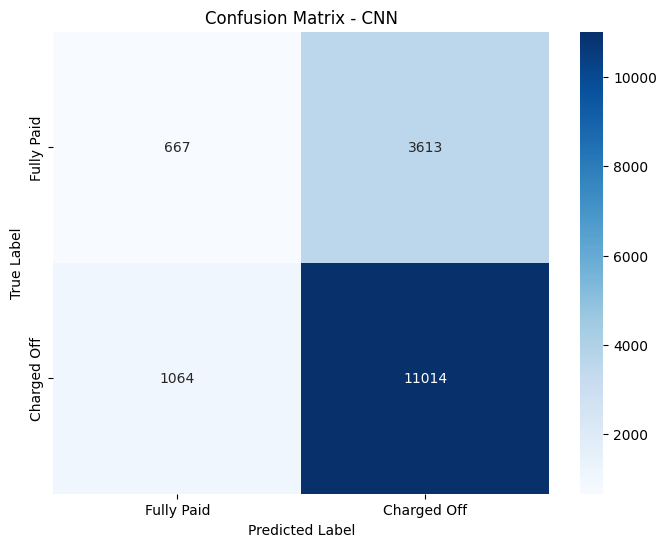

In [54]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_4, annot=True, fmt='d', cmap='Blues', xticklabels=['Fully Paid', 'Charged Off'], yticklabels=['Fully Paid', 'Charged Off'])
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
# Create a dictionary to store all metrics
metrics = {
    "Model": ["Gradient Boosting", "XGBoost", "CNN", "LSTM"],
    "Accuracy": [accuracy, accuracy1, accuracy_4, accuracy3],
    "Precision": [precision, precision1, precision_4, precision3],
    "Recall": [recall, recall1, recall_4, recall3],
    "F1 Score": [f1, f1_1, f1_4, f1_3],
    #"Confusion Matrix": [cm, cm1, cm_4, cm_3]
}

# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(metrics)

# Print the comparison table
print(df_metrics)

               Model  Accuracy  Precision  Recall  F1 Score
0  Gradient Boosting      0.69       0.66    0.69      0.67
1            XGBoost      0.71       0.66    0.71      0.67
2                CNN      0.71       0.75    0.91      0.82
3               LSTM      0.67       0.76    0.81      0.79
